In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

In [2]:
file_name = "NOAAGlobalTemp_v6.0.0_gridded_s185001_e202505_c20250608T185757.nc"
data = nc.Dataset(file_name,'r')

In [3]:
data.variables.keys()

dict_keys(['time', 'lat', 'lon', 'z', 'anom'])

In [4]:
# dataset.dimensions.keys() -> doesnt work

In [5]:
time = data.variables['time'][:]
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
anom = data.variables['anom'][:]
z = data.variables['z'][:]

anom = np.squeeze(anom)

In [6]:
observations = []
for t_i, t in enumerate(time):
    for lat_i, la in enumerate(lat):
        for lon_i, lo in enumerate(lon):
            observations.append([t, la, lo, anom[t_i, lat_i, lon_i]])

In [7]:
# time_grid, lat_grid, lon_grid = np.meshgrid(time,lat,lon, indexing='ij')

In [8]:
df = pd.DataFrame(
    observations,
    columns = ['time', 'lat', 'lon', 'anom'])

In [9]:
df.head()

,time,lat,lon,anom
0,18262.0,-87.5,2.5,-0.882934
1,18262.0,-87.5,7.5,-1.224205
2,18262.0,-87.5,12.5,0.505590
3,18262.0,-87.5,17.5,-0.625643
4,18262.0,-87.5,22.5,1.520231


In [10]:
# df.to_csv('output_new.csv', index=False)

In [11]:
df.tail()

,time,lat,lon,anom
5456155,82300.0,87.5,337.5,3.665694
5456156,82300.0,87.5,342.5,3.961208
5456157,82300.0,87.5,347.5,4.268205
5456158,82300.0,87.5,352.5,4.342409
5456159,82300.0,87.5,357.5,3.960052


In [12]:
import datetime

def time_to_date(time_value):
    base_date = datetime.datetime(1800, 1, 1)
    dt = base_date + datetime.timedelta(days=float(time_value))
    return dt

dt = time_to_date(18262)
year, month, day = dt.year, dt.month, dt.day
print(f"Year:{year}, Month: {month}, Day:{day}")

dt = time_to_date(82300)
year, month, day = dt.year, dt.month, dt.day
print(f"Year:{year}, Month: {month}, Day:{day}")


df['time_dt'] = df['time'].apply(time_to_date)

Year:1850, Month: 1, Day:1
Year:2025, Month: 5, Day:1


In [13]:
df.head()

,time,lat,lon,anom,time_dt
0,18262.0,-87.5,2.5,-0.882934,1850-01-01
1,18262.0,-87.5,7.5,-1.224205,1850-01-01
2,18262.0,-87.5,12.5,0.505590,1850-01-01
3,18262.0,-87.5,17.5,-0.625643,1850-01-01
4,18262.0,-87.5,22.5,1.520231,1850-01-01


### Longitude Adjustment
Convert longitude coordinates into range of -180 to 180 degrees

In [15]:
df['long_adj'] = df['lon'].apply(lambda x: x if x<= 180 else x-360)

In [16]:
df.head()

,time,lat,lon,anom,time_dt,long_adj
0,18262.0,-87.5,2.5,-0.882934,1850-01-01,2.5
1,18262.0,-87.5,7.5,-1.224205,1850-01-01,7.5
2,18262.0,-87.5,12.5,0.505590,1850-01-01,12.5
3,18262.0,-87.5,17.5,-0.625643,1850-01-01,17.5
4,18262.0,-87.5,22.5,1.520231,1850-01-01,22.5


In [17]:
# df.to_csv('output_new.csv', index=False)

### Visualisation of Average temperatures for fixed latitude and longitude

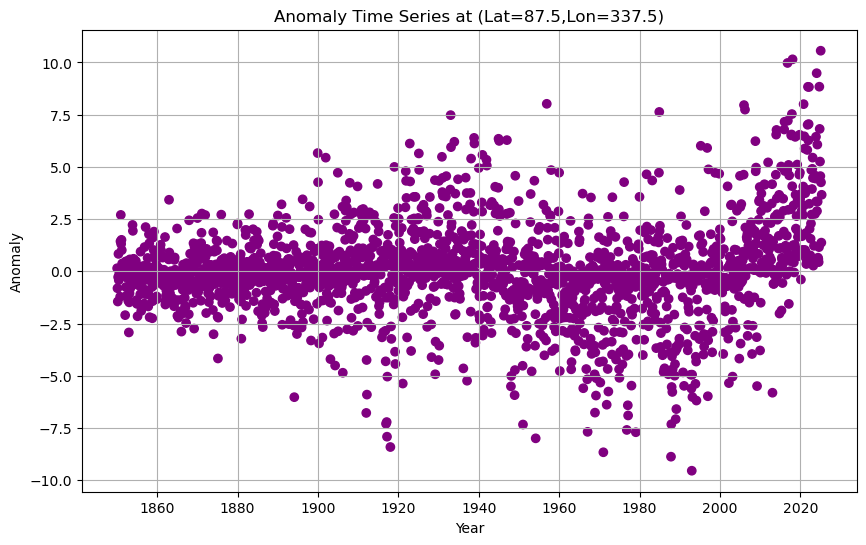

In [19]:
# lat_idx = np.argmin(np.abs(lat))
# lon_idx = np.argmin(np.abs(lon))

# anom_series = anom[:, lat_idx, lon_idx]
# time_str = [t.strftime('%Y-%m-%d') for t in time]

# plt.figure(figsize=(10,6))
# plt.plot(time_str,anom_series)
# plt.title("Anomaly Time Series at (Lat=0,Lon=0)")
# plt.xlabel('Year')
# plt.ylabel('Anomaly')
# plt.grid(True)
# plt.show()

# df_filtered = df[(df['time_dt'].dt.year >= 1850) & (df['time_dt'].dt.year <=2024)]

#plotting for fixed lat and lon from 1850 to 2025
df_point = df[(df['lat'] == 87.5) & (df['lon'] == 337.5)]

plt.figure(figsize=(10,6))
plt.scatter(df_point['time_dt'],df_point['anom'], color='purple', linestyle='')
#edit 6-28-25: make plot marker line instead of o for clarity
# plt.plot(df_filtered['time_dt'],df_filtered['anom'], marker='o')
plt.title("Anomaly Time Series at (Lat=87.5,Lon=337.5)")
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.grid(True)
plt.show()

In [20]:
# lat_band = (lat >= 30) & (lat <=60)
# anom_avg = anom[:,lat_band,:].mean(axis=(1,2))

# plt.figure(figsize=(10,6))
# plt.plot(time,anom_avg, marker="o")
# plt.title("Average Anomaly  (30N to 60N)")
# plt.xlabel("Year")
# plt.ylabel('Anomaly')
# plt.grid(True)
# plt.show()

#### Finding top 10 coldest and warmest years
need to filter for full years --> 1850 to 2024 (dont include 2025 information)

In [22]:
df_filtered = df[(df['time_dt'].dt.year >= 1850) & (df['time_dt'].dt.year <=2024)]
df_filtered['year'] = df_filtered['time_dt'].dt.year

/var/folders/8r/zts6_zj55d76ch5qjqy58_xc0000gn/T/ipykernel_17803/694909491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['time_dt'].dt.year


In [23]:
df_filtered.head()

,time,lat,lon,anom,time_dt,long_adj,year
0,18262.0,-87.5,2.5,-0.882934,1850-01-01,2.5,1850
1,18262.0,-87.5,7.5,-1.224205,1850-01-01,7.5,1850
2,18262.0,-87.5,12.5,0.505590,1850-01-01,12.5,1850
3,18262.0,-87.5,17.5,-0.625643,1850-01-01,17.5,1850
4,18262.0,-87.5,22.5,1.520231,1850-01-01,22.5,1850


In [24]:
global_anomaly_yr = df_filtered.groupby('year')['anom'].mean().reset_index()

In [25]:
top_warmest = global_anomaly_yr.sort_values(by='anom', ascending=False).head(10)

In [26]:
print(top_warmest)

     year      anom
174  2024  1.154394
173  2023  1.026564
166  2016  0.915603
170  2020  0.914704
169  2019  0.851828
172  2022  0.819432
167  2017  0.807746
168  2018  0.786847
171  2021  0.715041
165  2015  0.611395


In [27]:
top_coldest = global_anomaly_yr.sort_values(by='anom',ascending=True).head(10)

In [28]:
print(top_coldest)

    year      anom
67  1917 -0.716276
44  1894 -0.700588
62  1912 -0.670969
58  1908 -0.663730
37  1887 -0.651067
59  1909 -0.645570
54  1904 -0.630450
68  1918 -0.630443
53  1903 -0.629751
43  1893 -0.616625


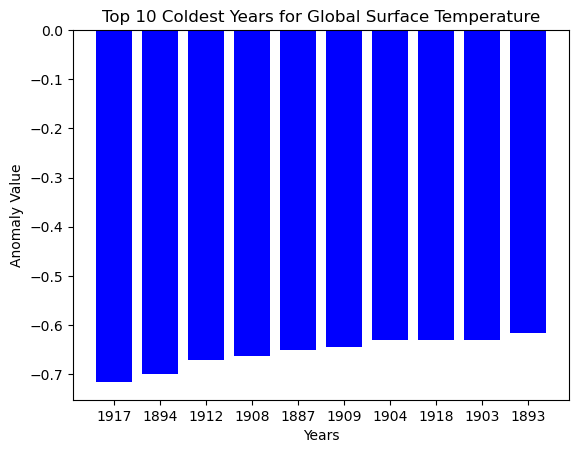

In [29]:
plt.bar(top_coldest['year'].astype(str), top_coldest['anom'], color = 'blue')
plt.title("Top 10 Coldest Years for Global Surface Temperature")
plt.xlabel('Years')
plt.ylabel('Anomaly Value')
plt.show()

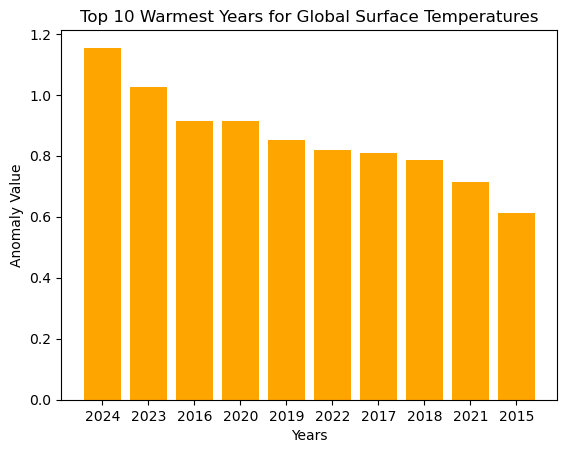

In [30]:
plt.bar(top_warmest['year'].astype(str), top_warmest['anom'], color = "orange")
plt.title("Top 10 Warmest Years for Global Surface Temperatures")
plt.xlabel("Years")
plt.ylabel("Anomaly Value")
plt.show()

In [31]:
#Descriptive Statistics
descriptive_stats = df['anom'].describe().astype(float)
print(descriptive_stats)

count    5.456160e+06
mean    -2.087204e-01
std      1.448970e+00
min     -1.819999e+01
25%     -7.681799e-01
50%     -2.281938e-01
75%      3.220689e-01
max      1.523256e+01
Name: anom, dtype: float64


### Part 2: Smoothing and Global Temperature Anomolies 

36.16778236154637, -86.80346190811088

converted 36.17, 273.92




In [34]:
from scipy.ndimage import gaussian_filter1d

In [35]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [36]:
# from statsmodels.nonparametric.smoothers_lowess import lowess

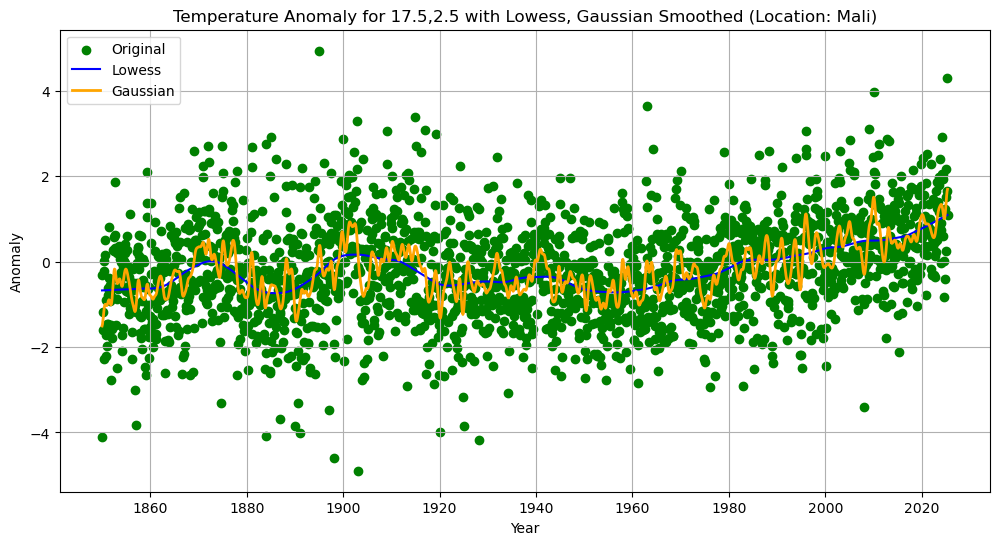

In [37]:
#using LOWESS and Gaussian methods
from statsmodels.nonparametric.smoothers_lowess import lowess

df_point = df[(df['lat'] == 17.5) & (df['long_adj'] == 2.5)] #Mali
lowess = lowess(df_point['anom'], df_point['time_dt'].map(datetime.datetime.toordinal),frac=0.1)
y_gaussian = gaussian_filter1d(df_point['anom'], sigma=4)
plt.figure(figsize=(12,6))

#tried using a scatterplot instead to test readability of results

# plt.scatter(df_point['time_dt'], df_point['anom'], c='blue', cmap='colormap', s=50,edgecolor='k')
# plt.scatter(df_point['time_dt'], lowess[:,1], c="red", cmap='colormap', s=45,label='Lowess' )
# plt.scatter(df_point['time_dt'], y_gaussian, c='yellow', cmap='colormap', s=20, label='Gaussian')

plt.scatter(df_point['time_dt'], df_point['anom'], color='green', label='Original')
plt.plot(df_point['time_dt'], lowess[:,1], color="blue", label='Lowess' )
plt.plot(df_point['time_dt'], y_gaussian, color='orange',linewidth=2, label="Gaussian") #this line is not as smooth as LOWESS 
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title("Temperature Anomaly for 17.5,2.5 with Lowess, Gaussian Smoothed (Location: Mali)")
plt.legend()
plt.grid(True)
plt.show()

In [38]:
## extra

# y_gaussian = gaussian_filter1d(y, sigma=2)

# plt.figure(figsize=(12,6))
# plt.plot(df_point['time_dt'], df_point['anom'], color='green', label='Original')
# plt.plot(df_point['time_dt'], y_gaussian, color='blue',linewidth=2, label="Gaussian Smoothed Line")
# plt.plot(df_point['time_dt'], trend_line, color='orange', linewidth=2, label="Lin Trend")
# plt.xlabel('Year')
# plt.ylabel('Anomaly')
# plt.title("Global Average Temperature with Gaussian Smoothing and Linear Trend")
# plt.legend()
# plt.grid(True)
# plt.show()


### Global Temperature Anomalies

In [40]:
# MA
window_size = 70
ma_y_2 = df['anom'] #original df
ma_result_2 = ma_y_2.rolling(window=window_size, center=True).mean()

#LOWESS
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_global_2 = lowess(df['anom'], df['time_dt'].map(datetime.datetime.toordinal),frac=0.3)


# G
# y_gaussian_2 = gaussian_filter1d(df['anom'], sigma=6)

In [41]:
# global_anom = df.groupby('time_dt')['anom'].mean().reset_index() #average sep by month/yr (indv points mean average for each month in a yr)

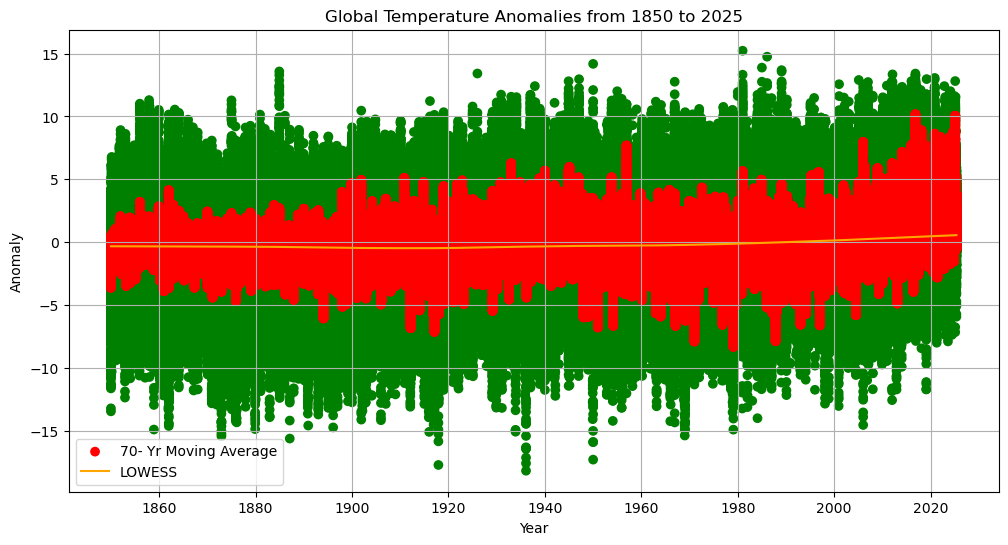

In [42]:
plt.figure(figsize=(12,6))
plt.scatter(df['time_dt'], df['anom'], color='green', linestyle='')
plt.scatter(df['time_dt'], ma_result_2, color='red', label=f'{window_size}- Yr Moving Average', linestyle='')
plt.plot(df['time_dt'], lowess_global_2[:,1], color='orange', label='LOWESS')
# plt.plot(df['time_dt'], y_gaussian_2, color='cyan',linewidth=3, label="Gaussian")
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.legend()
plt.title("Global Temperature Anomalies from 1850 to 2025")
plt.grid(True)
plt.show()

In [43]:
global_anom = df.groupby('time_dt')['anom'].mean().reset_index() #average sep by month/yr (indv points mean average for each month in a yr)

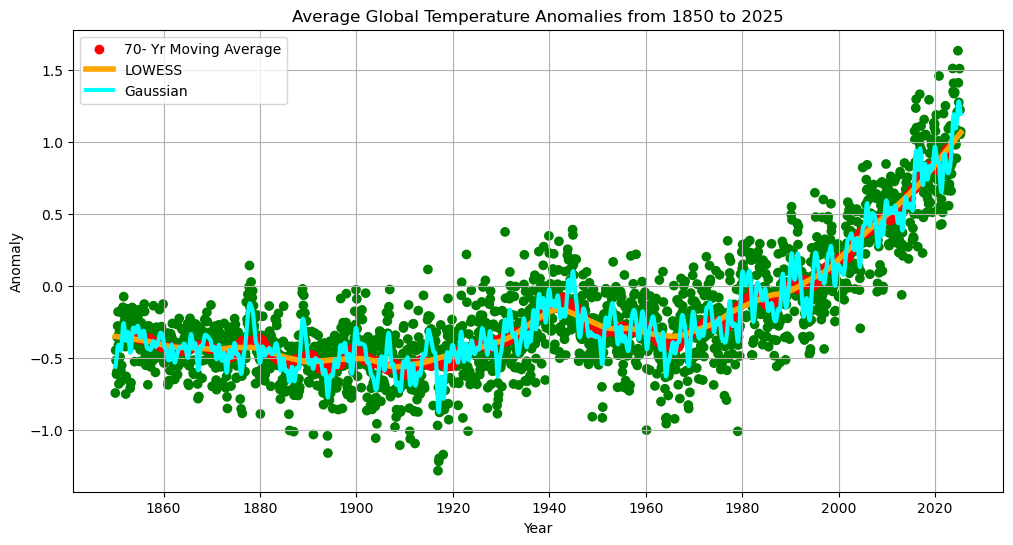

In [44]:
#try to apply moving average to smooth data
window_size = 70 #using a more aggressive window allows for some sense of viewing a trend, but 
# ma_y = df['anom'] #original df
ma_y = global_anom['anom']
ma_result = ma_y.rolling(window=window_size, center=True).mean()

#LOWESS
from statsmodels.nonparametric.smoothers_lowess import lowess
# lowess_global = lowess(df['anom'], df['time_dt'].map(datetime.datetime.toordinal),frac=0.3) #increased to 30 percent to note any changes
lowess_global = lowess(global_anom['anom'], global_anom['time_dt'].map(datetime.datetime.toordinal),frac=0.1) #increased to 30 percent to note any changes


y_gaussian = gaussian_filter1d(global_anom['anom'], sigma=3)

plt.figure(figsize=(12,6))
plt.scatter(global_anom['time_dt'], global_anom['anom'], color='green', linestyle='')
plt.scatter(global_anom['time_dt'], ma_result, color='red', label=f'{window_size}- Yr Moving Average', linestyle='')
plt.plot(global_anom['time_dt'], lowess_global[:,1], color='orange', linewidth=4, label='LOWESS')
plt.plot(global_anom['time_dt'], y_gaussian, color='cyan',linewidth=3, label="Gaussian")
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.legend()
plt.title("Average Global Temperature Anomalies from 1850 to 2025")
plt.grid(True)
plt.show()

### 07/07/2025 update
Plotting STD with mean for global average surface temperatures

In [46]:
# just exploring with visualizing standard deviation with global temp mean; will come back to later


# std_vis_df = df.groupby('time_dt')['anom'].agg(['mean','std']).reset_index()
# plt.figure(figsize=(12,6))

# plt.scatter(std_vis_df['time_dt'], std_vis_df['mean'], label='Mean', color='steelblue')
# plt.fill_between(
#     std_vis_df['time_dt'],
#     std_vis_df['mean'] - std_vis_df['std'],
#     std_vis_df['mean'] + std_vis_df ['std'],
#     color='darkslategrey',
#     alpha=0.3,
#     label='+- STD DEV'
# )

# plt.xlabel('Time')
# plt.ylabel('Anomaly')
# plt.legend()
# plt.grid(True)
# plt.show()

### Next Step: Data visualisation of regions
- Get information about lets say, 2 regions in the world: East Asia and North Africa

Africa
- lat ranges = 35 degrees N , 35 degrees South
- Long ranges = 17.5 degrees W, 51.5 E
- 

In [49]:
df.head()

,time,lat,lon,anom,time_dt,long_adj
0,18262.0,-87.5,2.5,-0.882934,1850-01-01,2.5
1,18262.0,-87.5,7.5,-1.224205,1850-01-01,7.5
2,18262.0,-87.5,12.5,0.505590,1850-01-01,12.5
3,18262.0,-87.5,17.5,-0.625643,1850-01-01,17.5
4,18262.0,-87.5,22.5,1.520231,1850-01-01,22.5


In [50]:
af_df = df[(df['lat'] >= -35.5) & (df['lat'] <= 37) & (df['long_adj'] >= -17.5) & (df['long_adj'] <= 51.5)]

In [51]:
af_anom = af_df.groupby('time_dt')['anom'].mean().reset_index()

In [52]:
# af_df.head()

In [53]:
# af_df.tail()

In [54]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_af = lowess(af_anom['anom'], af_anom['time_dt'].map(datetime.datetime.toordinal),frac=0.3) #increased to 30 percent to note any changes

In [55]:
#Gaussian
af_gaussian = gaussian_filter1d(af_anom['anom'], sigma=2)

In [56]:
#MA
window_size = 30 
ma_af_y = af_anom['anom']
ma_af_result = ma_af_y.rolling(window=window_size, center=True).mean()

In [57]:
# plt.figure(figsize=(12,6))
# plt.scatter(af_df['time_dt'], af_df['anom'], color='cyan', linestyle='')
# plt.plot(af_df['time_dt'], lowess_af[:,1], color='blue', label='Lowess')
# plt.xlabel('Years')
# plt.ylabel('Anomaly')
# plt.title('Average Surface Temperature Anomalies for region of Africa')
# plt.legend()
# plt.grid(True)
# plt.show()

In [58]:
# print(af_anom)
# af_anom.tail()

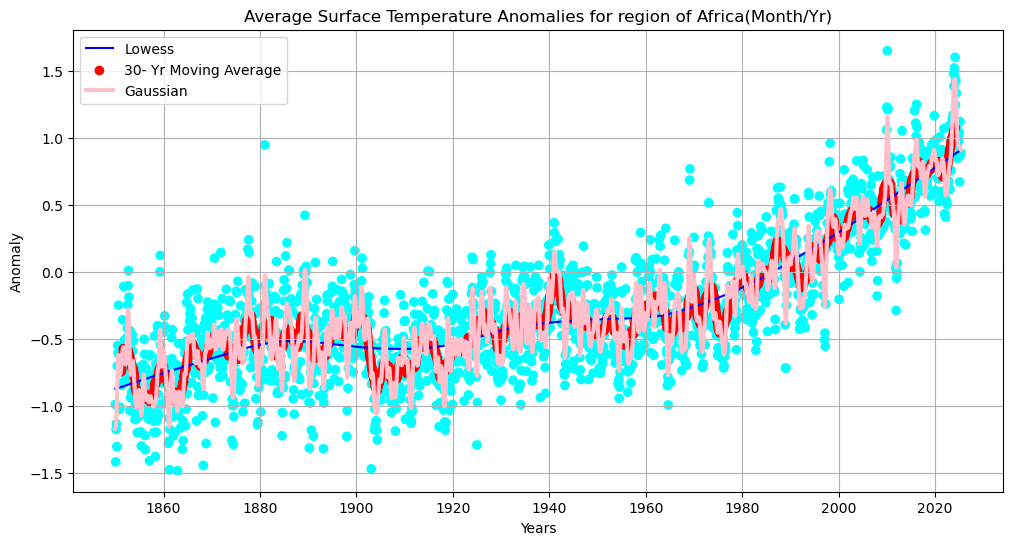

In [59]:
#this groups the average suface temp anomalies by each unique date (each month in a year) (ex: Jan 1850, February 1850, etc.)
plt.figure(figsize=(12,6))
plt.scatter(af_anom['time_dt'], af_anom['anom'], color='cyan', linestyle='')
plt.plot(af_anom['time_dt'], lowess_af[:,1], color='blue', label='Lowess')
plt.scatter(af_anom['time_dt'], ma_af_result, color='red', label=f'{window_size}- Yr Moving Average', linestyle='')
plt.plot(af_anom['time_dt'], af_gaussian, color='pink',linewidth=3, label="Gaussian")
plt.xlabel('Years')
plt.ylabel('Anomaly')
plt.title('Average Surface Temperature Anomalies for region of Africa(Month/Yr)')
plt.legend()
plt.grid(True)
plt.show()

#this groups the average suface temp anomalies by month for each year (ex: Jan 1850, February 1850, etc.)

## North America
Lat = 15 to 70 
Long = -170 to -50

In [61]:
na_df = df[(df['lat'] >= 15) & (df['lat'] <= 72) & (df['long_adj'] >= -170) & (df['long_adj'] <= -50)]

In [62]:
na_anom = na_df.groupby('time_dt')['anom'].mean().reset_index()

In [63]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_na = lowess(na_anom['anom'], na_anom['time_dt'].map(datetime.datetime.toordinal),frac=0.3)

In [64]:
#Gaussian
na_gaussian = gaussian_filter1d(na_anom['anom'], sigma=2)

In [65]:
#MA
window_size = 30 
ma_na_y = na_anom['anom']
ma_na_result = ma_na_y.rolling(window=window_size, center=True).mean()

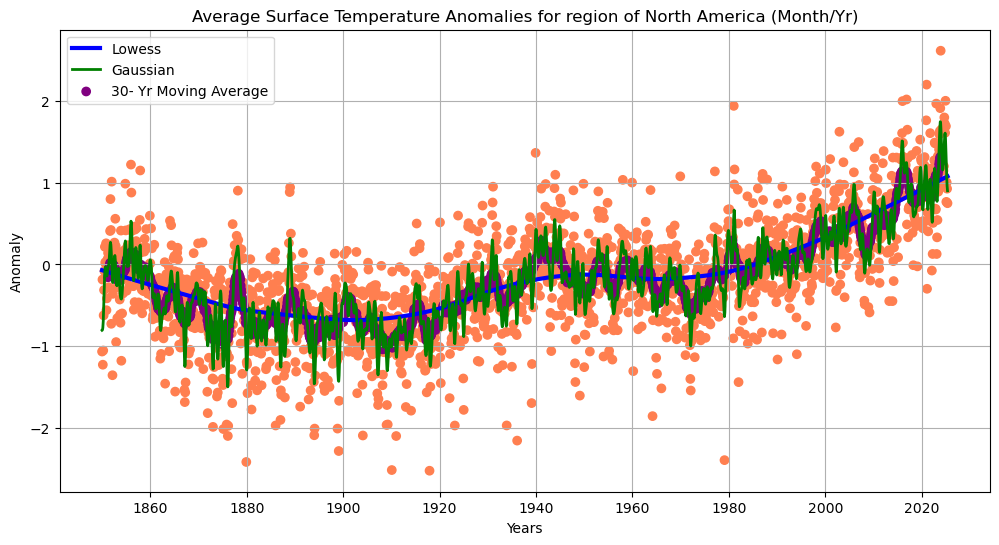

In [66]:
plt.figure(figsize=(12,6))
plt.scatter(na_anom['time_dt'], na_anom['anom'], color='coral', linestyle='')
plt.plot(na_anom['time_dt'], lowess_na[:,1], color='blue',linewidth=3,label='Lowess')
plt.plot(na_anom['time_dt'], na_gaussian, color='green',linewidth=2, label="Gaussian")
plt.scatter(na_anom['time_dt'], ma_na_result, color='purple', label=f'{window_size}- Yr Moving Average', linestyle='')
plt.xlabel('Years')
plt.ylabel('Anomaly')
plt.title('Average Surface Temperature Anomalies for region of North America (Month/Yr)')
plt.legend()
plt.grid(True)
plt.show()


### South America 
Lat = 12N -50S
Long = -35 W and -82 E

In [68]:
sa_df = df[(df['lat'] >= -50) & (df['lat'] <= 12) & (df['long_adj'] >= -82) & (df['long_adj'] <= -35)]

In [69]:
sa_anom = sa_df.groupby('time_dt')['anom'].mean().reset_index()

In [70]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_sa = lowess(sa_anom['anom'], sa_anom['time_dt'].map(datetime.datetime.toordinal),frac=0.3)

In [71]:
#Gaussian
sa_gaussian = gaussian_filter1d(sa_anom['anom'], sigma=2)

In [72]:
#MA
window_size = 30 
ma_sa_y = sa_anom['anom']
ma_sa_result = ma_sa_y.rolling(window=window_size, center=True).mean()

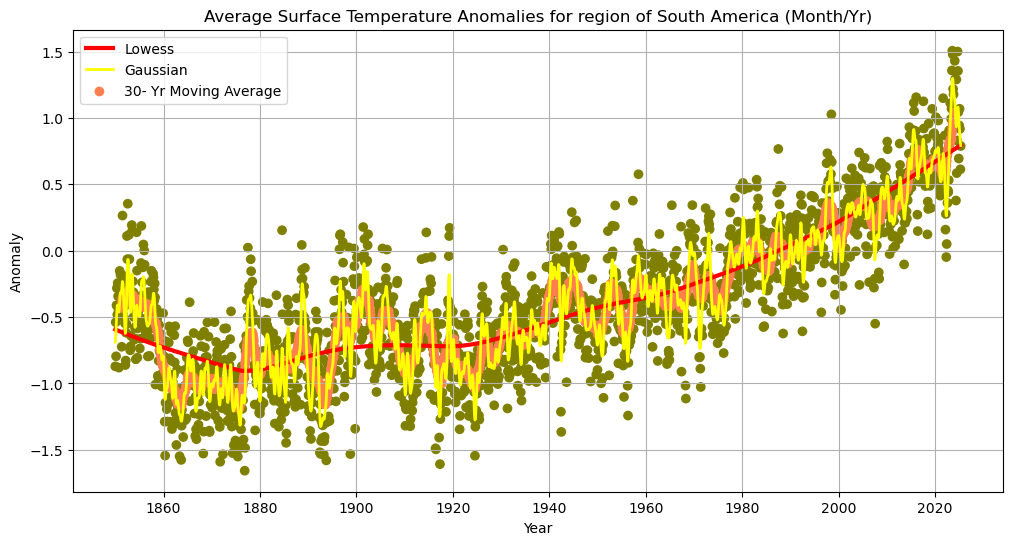

In [73]:
plt.figure(figsize=(12,6))
plt.scatter(sa_anom['time_dt'], sa_anom['anom'], color='olive', linestyle='')
plt.plot(sa_anom['time_dt'], lowess_sa[:,1], color='red',linewidth=3,label='Lowess')
plt.plot(sa_anom['time_dt'], sa_gaussian, color='yellow',linewidth=2, label="Gaussian")
plt.scatter(sa_anom['time_dt'], ma_sa_result, color='coral', label=f'{window_size}- Yr Moving Average', linestyle='')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Average Surface Temperature Anomalies for region of South America (Month/Yr)')
plt.legend()
plt.grid(True)
plt.show()


### Heatmap Visualisation

In [75]:
import seaborn as sns

In [80]:
df['year'] = df['time_dt'].dt.year
df['month'] = df['time_dt'].dt.month

In [82]:
df

,time,lat,lon,anom,time_dt,long_adj,year,month
0,18262.0,-87.5,2.5,-0.882934,1850-01-01,2.5,1850,1
1,18262.0,-87.5,7.5,-1.224205,1850-01-01,7.5,1850,1
2,18262.0,-87.5,12.5,0.505590,1850-01-01,12.5,1850,1
3,18262.0,-87.5,17.5,-0.625643,1850-01-01,17.5,1850,1
4,18262.0,-87.5,22.5,1.520231,1850-01-01,22.5,1850,1
...,...,...,...,...,...,...,...,...
5456155,82300.0,87.5,337.5,3.665694,2025-05-01,-22.5,2025,5
5456156,82300.0,87.5,342.5,3.961208,2025-05-01,-17.5,2025,5
5456157,82300.0,87.5,347.5,4.268205,2025-05-01,-12.5,2025,5
5456158,82300.0,87.5,352.5,4.342409,2025-05-01,-7.5,2025,5


In [84]:
month_avg = df.groupby(['year','month'])['anom'].mean().reset_index()

In [86]:
heatmap = month_avg.pivot(index='month',columns='year', values='anom')

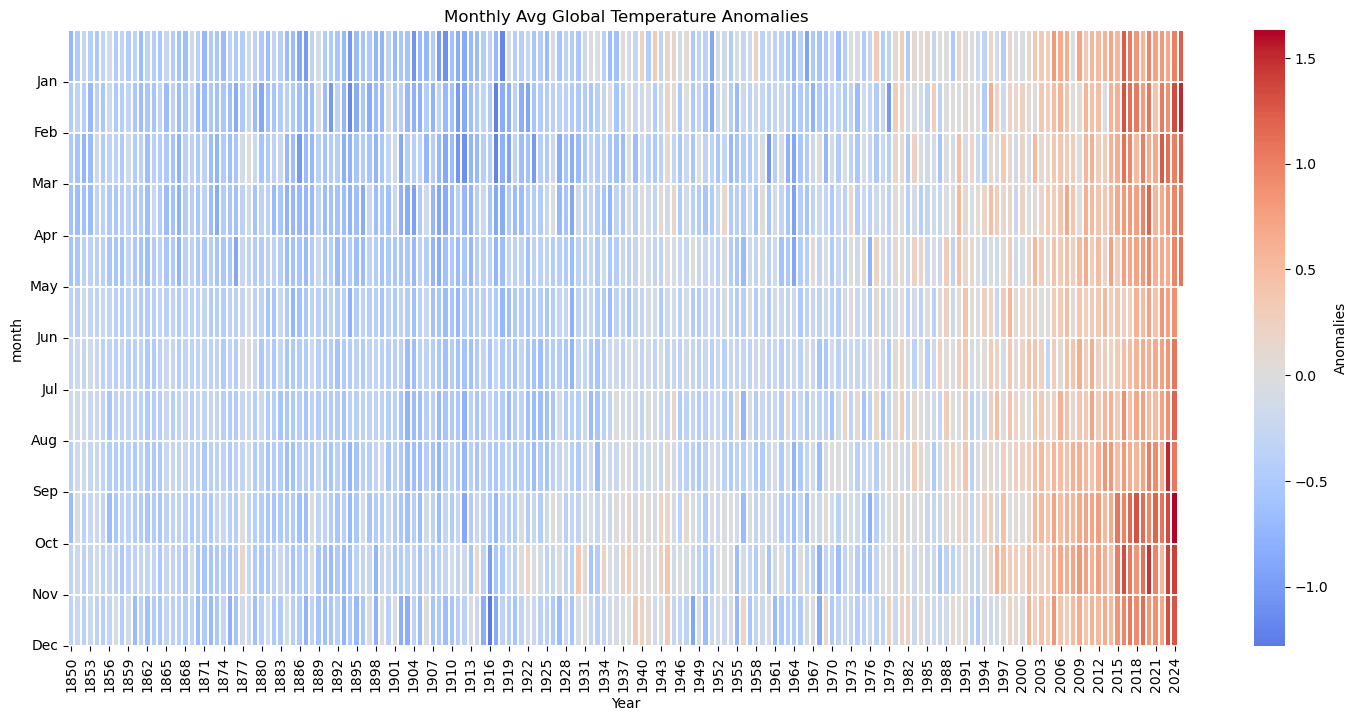

In [88]:
plt.figure(figsize=(18,8))

sns.heatmap(heatmap, cmap='coolwarm', center = 0, cbar_kws={'label':'Anomalies'}, linewidth=0.1)

plt.title("Monthly Avg Global Temperature Anomalies")
plt.xlabel('Year')
# plt.ylabel('Anomaly')
plt.yticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

In [90]:
sub = df[df['time_dt'] == '2000-01-01']

In [92]:
sub_heatmap = sub.pivot(index='month', columns='', values='anom')
sub_heatmap = sub_heatmap.sort_index(ascending=False)

KeyError: ''

In [94]:
plt.figure(figsize=(12,6))
sns.heatmap(sub_heatmap, cmap='coolwarm', center = 0, cbar_kws={'label':'Anomalies'})

plt.title("Avg Global Temperature Anomalies for Jan 1, 2000")
plt.xlabel('Long')
plt.ylabel('Lat')
# plt.yticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

NameError: name 'sub_heatmap' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# df.to_csv("global_anomalies.csv", index=False)

In [ ]:
# df.head()

In [98]:
df['year'] = df['time_dt'].dt.year

In [100]:
lat_avg = df.groupby(['year', 'lat',])['anom'].mean().reset_index()

In [102]:
lat_yr_map = lat_avg.pivot(index='lat', columns='year', values='anom')

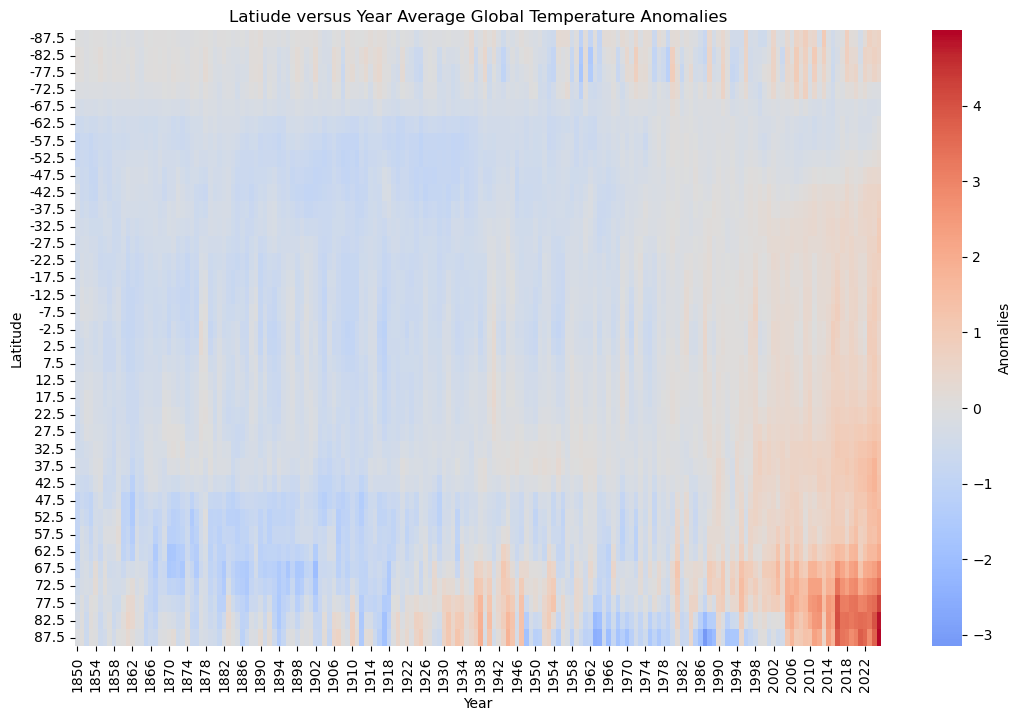

In [106]:
plt.figure(figsize=(13,8))

sns.heatmap(lat_yr_map, cmap='coolwarm', center = 0, cbar_kws={'label':'Anomalies'})

plt.title("Latiude versus Year Average Global Temperature Anomalies")
plt.xlabel('Year')
plt.ylabel('Latitude')
plt.show()

#### Ocean Anomalies

Atlantic Ocean Latitude and Longitude values:
- Lat = -60 to +60
- Long = -100 to +20

In [110]:
atlantic = df[(df['lat'] >= -60) & (df['lat'] <= 60) & (df['long_adj'] >= -100) & (df['long_adj'] <= 20)]

In [112]:
atlantic_anom = atlantic.groupby('time_dt')['anom'].mean().reset_index()

In [114]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_at = lowess(atlantic_anom['anom'], atlantic_anom['time_dt'].map(datetime.datetime.toordinal),frac=0.3)

In [116]:
window_size = 30 
ma_at_y = atlantic_anom['anom']
ma_at_result = ma_at_y.rolling(window=window_size, center=True).mean()

at_gaussian = gaussian_filter1d(atlantic_anom['anom'], sigma=2)

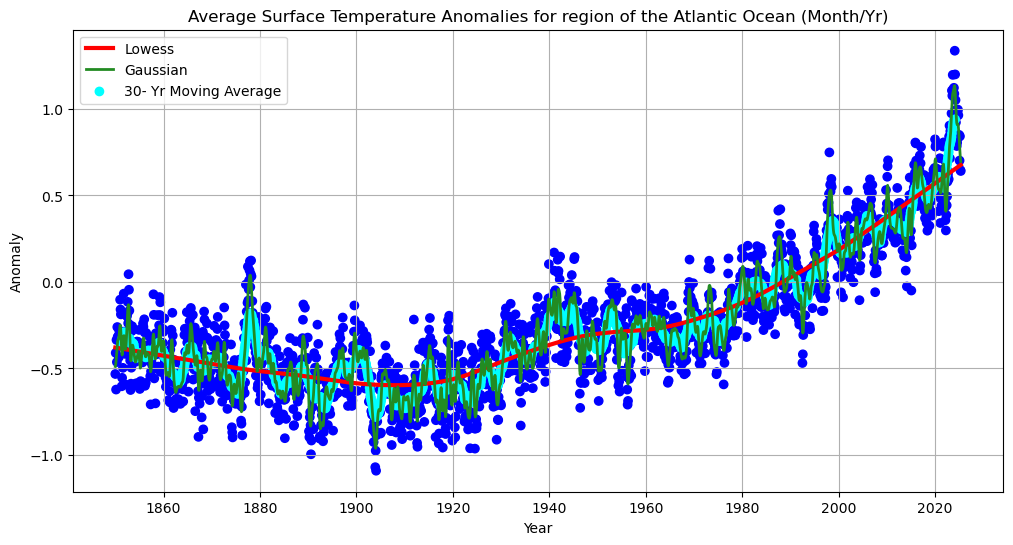

In [118]:
plt.figure(figsize=(12,6))
plt.scatter(atlantic_anom['time_dt'], atlantic_anom['anom'], color='blue', linestyle='')
plt.plot(atlantic_anom['time_dt'], lowess_at[:,1], color='red',linewidth=3,label='Lowess')
plt.plot(atlantic_anom['time_dt'], at_gaussian, color='forestgreen',linewidth=2, label="Gaussian")
plt.scatter(atlantic_anom['time_dt'], ma_at_result, color='cyan', label=f'{window_size}- Yr Moving Average', linestyle='')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Average Surface Temperature Anomalies for region of the Atlantic Ocean (Month/Yr)')
plt.legend()
plt.grid(True)
plt.show()

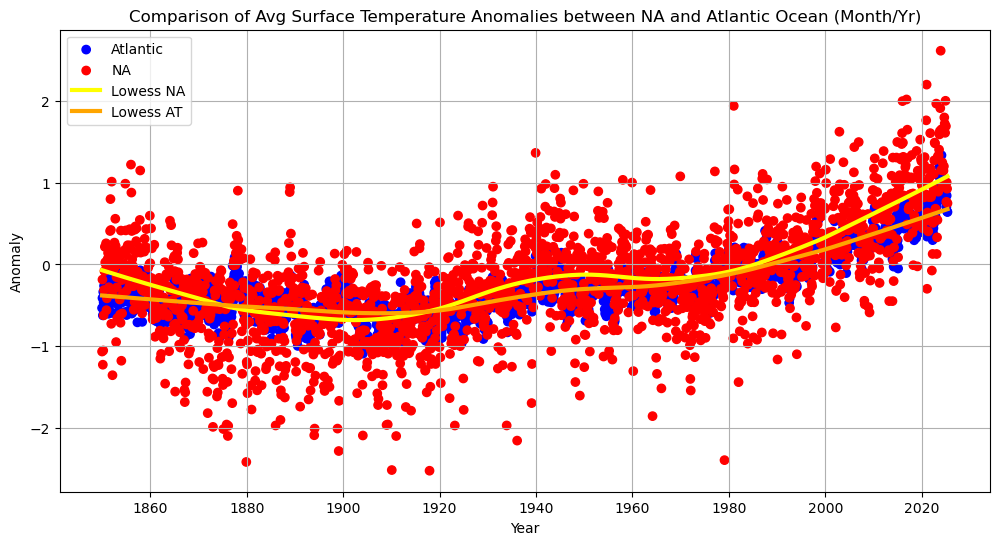

In [120]:
plt.figure(figsize=(12,6))
plt.scatter(atlantic_anom['time_dt'], atlantic_anom['anom'], color='blue', linestyle='', label='Atlantic')
plt.scatter(na_anom['time_dt'], na_anom['anom'], color='red', linestyle='', label='NA')
plt.plot(na_anom['time_dt'], lowess_na[:,1], color='yellow',linewidth=3,label='Lowess NA')
plt.plot(atlantic_anom['time_dt'], lowess_at[:,1], color='orange',linewidth=3,label='Lowess AT')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Comparison of Avg Surface Temperature Anomalies between NA and Atlantic Ocean (Month/Yr)')
plt.legend()
plt.grid(True)
plt.show()

## Pacific Ocean

In [141]:
pacific = df[(df['lat'] >= -60) & (df['lat'] <= 60) & (df['lon'] >= 120) & (df['lon'] <= 290)]
# atlantic = df[(df['lat'] >= -60) & (df['lat'] <= 60) & (df['long_adj'] >= -100) & (df['long_adj'] <= 20)]

In [143]:
pacific

,time,lat,lon,anom,time_dt,long_adj,year,month
456,18262.0,-57.5,122.5,-0.851407,1850-01-01,122.5,1850,1
457,18262.0,-57.5,127.5,-0.840732,1850-01-01,127.5,1850,1
458,18262.0,-57.5,132.5,-0.771771,1850-01-01,132.5,1850,1
459,18262.0,-57.5,137.5,-0.638239,1850-01-01,137.5,1850,1
460,18262.0,-57.5,142.5,-0.585641,1850-01-01,142.5,1850,1
...,...,...,...,...,...,...,...,...
5455709,82300.0,57.5,267.5,0.798475,2025-05-01,-92.5,2025,5
5455710,82300.0,57.5,272.5,-0.037858,2025-05-01,-87.5,2025,5
5455711,82300.0,57.5,277.5,-0.094642,2025-05-01,-82.5,2025,5
5455712,82300.0,57.5,282.5,0.207793,2025-05-01,-77.5,2025,5


In [145]:
pacific_anom = pacific.groupby('time_dt')['anom'].mean().reset_index()

In [147]:
pacific_anom

,time_dt,anom
0,1850-01-01,-0.445258
1,1850-02-01,-0.404000
2,1850-03-01,-0.583847
3,1850-04-01,-0.687965
4,1850-05-01,-0.462730
...,...,...
2100,2025-01-01,0.744938
2101,2025-02-01,0.573962
2102,2025-03-01,0.733844
2103,2025-04-01,0.669070


In [149]:
from statsmodels.nonparametric.smoothers_lowess import lowess
lowess_pa = lowess(pacific_anom['anom'], pacific_anom['time_dt'].map(datetime.datetime.toordinal),frac=0.3)

In [151]:
window_size = 30 
ma_pa_y = pacific_anom['anom']
ma_pa_result = ma_pa_y.rolling(window=window_size, center=True).mean()

pa_gaussian = gaussian_filter1d(pacific_anom['anom'], sigma=2)

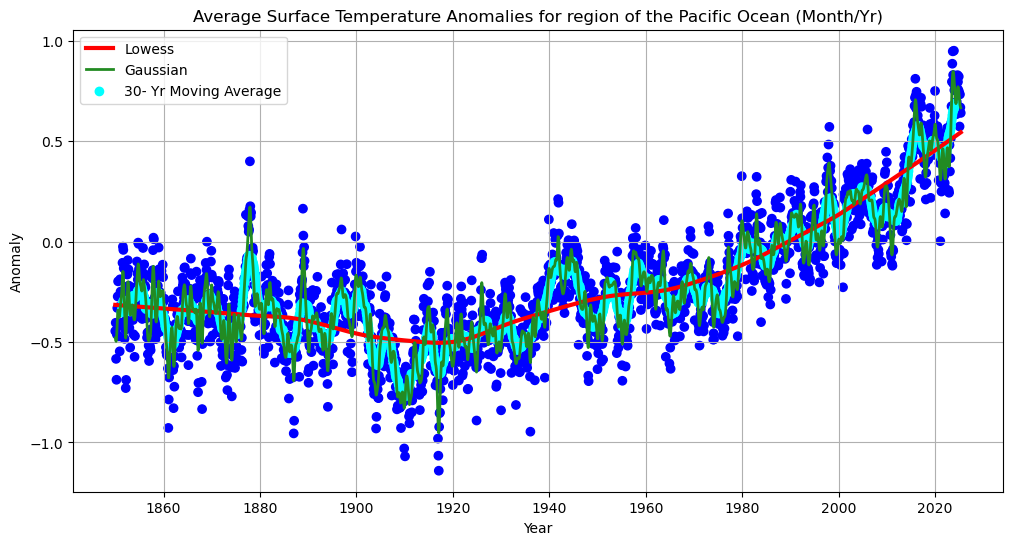

In [157]:
plt.figure(figsize=(12,6))
plt.scatter(pacific_anom['time_dt'], pacific_anom['anom'], color='blue', linestyle='')
plt.plot(pacific_anom['time_dt'], lowess_pa[:,1], color='red',linewidth=3,label='Lowess')
plt.plot(pacific_anom['time_dt'], pa_gaussian, color='forestgreen',linewidth=2, label="Gaussian")
plt.scatter(pacific_anom['time_dt'], ma_pa_result, color='cyan', label=f'{window_size}- Yr Moving Average', linestyle='')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Average Surface Temperature Anomalies for region of the Pacific Ocean (Month/Yr)')
plt.legend()
plt.grid(True)
plt.show()